In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


# 1.import data

In [1]:
print('hi')

hi


In [0]:
import pandas as pd
import numpy as np

In [0]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
cat = np.array(glob.glob('/content/drive/My Drive/Colab Notebooks/image/cats/*'))
dog = np.array(glob.glob('/content/drive/My Drive/Colab Notebooks/image/dogs/*'))
panda = np.array(glob.glob('/content/drive/My Drive/Colab Notebooks/image/panda/*'))

In [0]:
data_dog = pd.DataFrame([])
data_dog['path'] = dog
data_dog['answer'] = 0
data_cat = pd.DataFrame([])
data_cat['path'] = cat
data_cat['answer'] = 1
data_panda = pd.DataFrame([])
data_panda['path'] = panda
data_panda['answer'] = 2
data = pd.concat([data_dog,data_cat,data_panda],axis=0,ignore_index=True)

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
data.head()

,path,answer
0,/content/drive/My Drive/Colab Notebooks/image/...,0
1,/content/drive/My Drive/Colab Notebooks/image/...,0
2,/content/drive/My Drive/Colab Notebooks/image/...,0
3,/content/drive/My Drive/Colab Notebooks/image/...,0
4,/content/drive/My Drive/Colab Notebooks/image/...,0


In [0]:
import cv2

In [0]:
def imgtran(path):
  img = cv2.imread(path)
  img = cv2.resize(img,(224,224))
  b,g,r = cv2.split(img)
  rbg = cv2.merge([r,g,b])
  return rbg

In [0]:
data['image'] = data['path'].apply(imgtran)

# 2.create model

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization

In [0]:
vgg = tf.keras.applications.vgg16.VGG16(include_top=False,input_shape = (224,224,3))
vgg.trainable = False

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
58892288/58889256 [==============================] - 4s 0us/step


In [0]:
x = Flatten()(vgg.output)
x = BatchNormalization()(x)
x = Dense(2048,activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(256,activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(32,activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(3,activation='softmax')(x)
model_jmda = Model(inputs=vgg.input,outputs=x)

In [0]:
model_jmda.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [0]:
model_jmda.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [0]:
data['image'] = data['image'].apply(tf.keras.applications.vgg16.preprocess_input)

In [0]:
x_train = []
for i in data['image']:
  x_train.append(i)
x_train = np.array(x_train)
y_train = data['answer']

In [0]:
model_jmda.fit(x_train,y_train,epochs=20,batch_size=100,validation_split=0.2)

Train on 2400 samples, validate on 600 samples
Epoch 1/30
2400/2400 [==============================] - 23s 10ms/sample - loss: 0.3611 - sparse_categorical_accuracy: 0.8758 - val_loss: 0.2239 - val_sparse_categorical_accuracy: 0.9650
Epoch 2/30
2400/2400 [==============================] - 14s 6ms/sample - loss: 0.1304 - sparse_categorical_accuracy: 0.9675 - val_loss: 0.3665 - val_sparse_categorical_accuracy: 0.9467
Epoch 3/30
2400/2400 [==============================] - 14s 6ms/sample - loss: 0.0686 - sparse_categorical_accuracy: 0.9817 - val_loss: 0.0548 - val_sparse_categorical_accuracy: 0.9883
Epoch 4/30
2400/2400 [==============================] - 14s 6ms/sample - loss: 0.0419 - sparse_categorical_accuracy: 0.9900 - val_loss: 0.1024 - val_sparse_categorical_accuracy: 0.9850
Epoch 5/30
2400/2400 [==============================] - 15s 6ms/sample - loss: 0.0781 - sparse_categorical_accuracy: 0.9862 - val_loss: 0.0915 - val_sparse_categorical_accuracy: 0.9850
Epoch 6/30
2400/2400 [=====

In [0]:
train_loss,train_acc,test_loss,test_acc = model_jmda.history.history['loss'],model_jmda.history.history['sparse_categorical_accuracy'],model_jmda.history.history['val_loss'],model_jmda.history.history['val_sparse_categorical_accuracy']

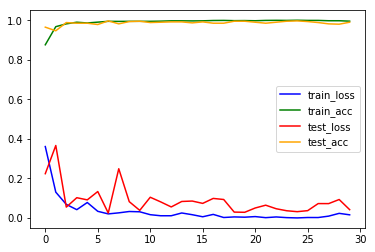

In [0]:
plt.plot(model_jmda.history.epoch,train_loss,'b',label='train_loss')
plt.plot(model_jmda.history.epoch,train_acc,'g',label='train_acc')
plt.plot(model_jmda.history.epoch,test_loss,'r',label='test_loss')
plt.plot(model_jmda.history.epoch,test_acc,'orange',label='test_acc')
plt.legend()